## Assignment-4

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

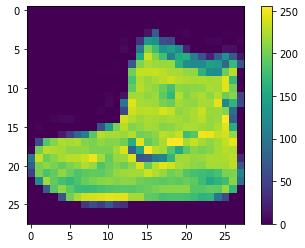

In [3]:
import matplotlib.pyplot as plt

plt.figure() 
plt.imshow(train_images[0]) 
plt.colorbar() 
plt.grid(False) 
plt.show()

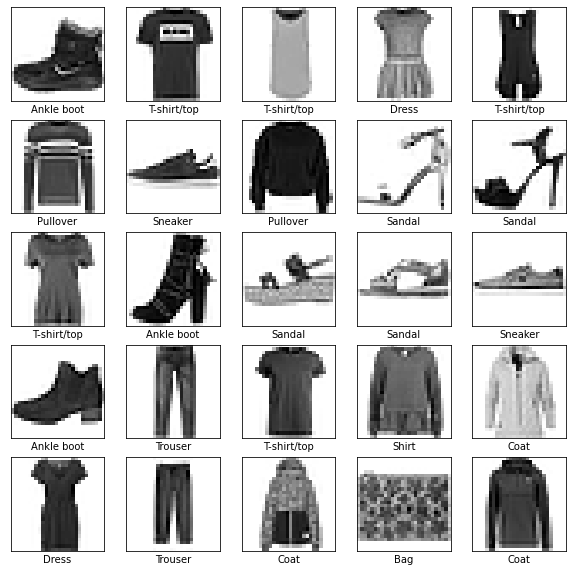

In [21]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

plt.figure(figsize=(10,10)) 
for i in range(25): 
    plt.subplot(5,5,i+1) 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.grid(False) 
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]]) 
plt.show()

In [4]:
num_pixels = train_images.shape[1] * train_images.shape[2] #28*28 = 784 
X_train = train_images.reshape(train_images.shape[0], num_pixels) 
X_test = test_images.reshape(test_images.shape[0], num_pixels) 
# normalize inputs from 0-255 to 0-1 
X_train = X_train / 255 
X_test = X_test / 255 
Y_test = test_labels 
from keras.utils import np_utils 
# one hot encode outputs 
y_train = np_utils.to_categorical(train_labels ) 
y_test = np_utils.to_categorical(test_labels ) 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras import optimizers 
hidden_nodes = 128 
num_classes = y_test.shape[1] 
def baseline_model(): 
# create model 
    model = Sequential() 
    model.add(Dense(num_pixels, input_dim= num_pixels, activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu')) 
    model.add(Dense(num_classes, activation='softmax')) 
    sgd = optimizers.SGD(lr=0.01) 
    # Compile model 
    model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
    return model


In [6]:
model = baseline_model() 
# Fit the model 
nn_simple = model.fit(X_train, y_train, validation_split=0.2, epochs=55, batch_size=200) 
# Final evaluation of the model 
scores = model.evaluate(X_test, y_test) 
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/55
240/240 [==============================] - 3s 13ms/step - loss: 0.0888 - accuracy: 0.1663 - val_loss: 0.0872 - val_accuracy: 0.2244
Epoch 2/55
240/240 [==============================] - 3s 13ms/step - loss: 0.0857 - accuracy: 0.3058 - val_loss: 0.0840 - val_accuracy: 0.3766
Epoch 3/55
240/240 [==============================] - 3s 12ms/step - loss: 0.0823 - accuracy: 0.4155 - val_loss: 0.0804 - val_accuracy: 0.4607
Epoch 4/55
240/240 [==============================] - 3s 12ms/step - loss: 0.0785 - accuracy: 0.4858 - val_loss: 0.0763 - val_accuracy: 0.5153
Epoch 5/55
240/240 [==============================] - 3s 11ms/step - loss: 0.0745 - accuracy: 0.5291 - val_loss: 0.0723 - val_accuracy: 0.5465
Epoch 6/55
240/240 [==============================] - 3s 11ms/step - loss: 0.0706 - accuracy: 0.5540 - val_loss: 0.0685 - val_accuracy: 0.5674
Epoch 7/55
240/240 [==============================] - 2s 10ms/step - loss: 0.0670 - accuracy: 0.5690 - val_loss: 0.0650 - val_accuracy: 0.5800

In [7]:
def baseline_model(): 
# create model 
    model = Sequential() 
    model.add(Dense(hidden_nodes, input_dim= num_pixels, kernel_initializer= 'normal',activation='relu'))
    model.add(Dense(128, kernel_initializer= 'normal', activation='relu')) 
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    sgd = optimizers.SGD(lr=0.01) 
# Compile model 
    model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
    return model

model = baseline_model() 
# Fit the model 
nn_simple = model.fit(X_train, y_train, validation_split=0.2, epochs=55, batch_size=200) 
# Final evaluation of the model 
scores = model.evaluate(X_test, y_test) 
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/55
240/240 [==============================] - 1s 5ms/step - loss: 0.0899 - accuracy: 0.1382 - val_loss: 0.0898 - val_accuracy: 0.1558
Epoch 2/55
240/240 [==============================] - 1s 6ms/step - loss: 0.0897 - accuracy: 0.1742 - val_loss: 0.0896 - val_accuracy: 0.1910
Epoch 3/55
240/240 [==============================] - 1s 5ms/step - loss: 0.0896 - accuracy: 0.2064 - val_loss: 0.0895 - val_accuracy: 0.2183
Epoch 4/55
240/240 [==============================] - 1s 5ms/step - loss: 0.0894 - accuracy: 0.2302 - val_loss: 0.0893 - val_accuracy: 0.2394
Epoch 5/55
240/240 [==============================] - 1s 5ms/step - loss: 0.0893 - accuracy: 0.2472 - val_loss: 0.0892 - val_accuracy: 0.2553
Epoch 6/55
240/240 [==============================] - 1s 5ms/step - loss: 0.0891 - accuracy: 0.2616 - val_loss: 0.0890 - val_accuracy: 0.2688
Epoch 7/55
240/240 [==============================] - 1s 5ms/step - loss: 0.0889 - accuracy: 0.2736 - val_loss: 0.0889 - val_accuracy: 0.2793
Epoch 

## SGD (Stochastic Gradient Descent)

In [8]:
sgd = optimizers.SGD(lr=0.01, momentum=0.9) 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

nn_simple = model.fit(X_train, y_train, validation_split=0.2, epochs=55, batch_size=200) 
# Final evaluation of the model 
scores = model.evaluate(X_test, y_test) 
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/55
240/240 [==============================] - 1s 6ms/step - loss: 0.7413 - accuracy: 0.7323 - val_loss: 0.5742 - val_accuracy: 0.7957
Epoch 2/55
240/240 [==============================] - 1s 6ms/step - loss: 0.5340 - accuracy: 0.8131 - val_loss: 0.4879 - val_accuracy: 0.8263
Epoch 3/55
240/240 [==============================] - 1s 5ms/step - loss: 0.4701 - accuracy: 0.8349 - val_loss: 0.4543 - val_accuracy: 0.8395
Epoch 4/55
240/240 [==============================] - 1s 5ms/step - loss: 0.4419 - accuracy: 0.8443 - val_loss: 0.4493 - val_accuracy: 0.8381
Epoch 5/55
240/240 [==============================] - 1s 6ms/step - loss: 0.4177 - accuracy: 0.8512 - val_loss: 0.4208 - val_accuracy: 0.8524
Epoch 6/55
240/240 [==============================] - 1s 5ms/step - loss: 0.3974 - accuracy: 0.8595 - val_loss: 0.4090 - val_accuracy: 0.8526
Epoch 7/55
240/240 [==============================] - 1s 5ms/step - loss: 0.3834 - accuracy: 0.8639 - val_loss: 0.3897 - val_accuracy: 0.8622
Epoch 

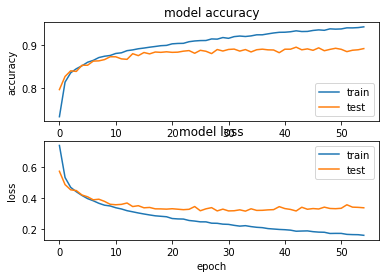

In [9]:
plt.subplot(2,1,1)
plt.plot(nn_simple.history['accuracy'])
plt.plot(nn_simple.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(nn_simple.history['loss'])
plt.plot(nn_simple.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Adam Optimizer 

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
nn_simple = model.fit(X_train, y_train, validation_split=0.2, epochs=55, batch_size=200) 
# Final evaluation of the model 
scores = model.evaluate(X_test, y_test) 
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/55
240/240 [==============================] - 1s 6ms/step - loss: 0.1887 - accuracy: 0.9306 - val_loss: 0.3718 - val_accuracy: 0.8827
Epoch 2/55
240/240 [==============================] - 1s 6ms/step - loss: 0.1894 - accuracy: 0.9284 - val_loss: 0.3847 - val_accuracy: 0.8733
Epoch 3/55
240/240 [==============================] - 1s 6ms/step - loss: 0.1819 - accuracy: 0.9319 - val_loss: 0.3632 - val_accuracy: 0.8879
Epoch 4/55
240/240 [==============================] - 2s 7ms/step - loss: 0.1809 - accuracy: 0.9337 - val_loss: 0.3661 - val_accuracy: 0.8843
Epoch 5/55
240/240 [==============================] - 1s 6ms/step - loss: 0.1694 - accuracy: 0.9372 - val_loss: 0.3564 - val_accuracy: 0.8863
Epoch 6/55
240/240 [==============================] - 1s 6ms/step - loss: 0.1650 - accuracy: 0.9385 - val_loss: 0.3520 - val_accuracy: 0.8907
Epoch 7/55
240/240 [==============================] - 1s 5ms/step - loss: 0.1650 - accuracy: 0.9380 - val_loss: 0.3531 - val_accuracy: 0.8887
Epoch 

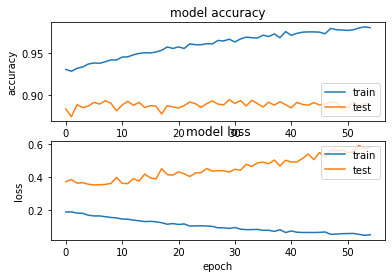

In [12]:
plt.subplot(2,1,1)
plt.plot(nn_simple.history['accuracy'])
plt.plot(nn_simple.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(nn_simple.history['loss'])
plt.plot(nn_simple.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Thw accuracy is quite the same with both SGD and Adam optimizer which is about 88.40%